In [75]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [76]:
human_data = pd.read_csv('data.csv')
human_data.head()

,Sequence,Outcome
0,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...,1
1,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...,1
2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...,1
3,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...,1
4,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...,1


In [77]:
classes = human_data.loc[:, 'Outcome']
print(classes[:])

0     1
1     1
2     1
3     1
4     1
     ..
94    0
95    0
96    0
97    0
98    0
Name: Outcome, Length: 99, dtype: int64


In [78]:
sequences = list(human_data.loc[:, 'Sequence'])
dataset = {}
for i, seq in enumerate(sequences):
   nucleotides = list(seq)
   nucleotides = [x for x in nucleotides if x != '\t']
   nucleotides.append(classes[i])
   dataset[i] = nucleotides
   print(dataset[0])
  

['t', 'g', 'c', 't', 'a', 't', 'c', 'c', 't', 'g', 'a', 'c', 'a', 'g', 't', 't', 'g', 't', 'c', 'a', 'c', 'g', 'c', 't', 'g', 'a', 't', 't', 'g', 'g', 't', 'g', 't', 'c', 'g', 't', 't', 'a', 'c', 'a', 'a', 't', 'c', 't', 'a', 'a', 'c', 'g', 'c', 'a', 't', 'c', 'g', 'c', 'c', 'a', 'a', 1]
['t', 'g', 'c', 't', 'a', 't', 'c', 'c', 't', 'g', 'a', 'c', 'a', 'g', 't', 't', 'g', 't', 'c', 'a', 'c', 'g', 'c', 't', 'g', 'a', 't', 't', 'g', 'g', 't', 'g', 't', 'c', 'g', 't', 't', 'a', 'c', 'a', 'a', 't', 'c', 't', 'a', 'a', 'c', 'g', 'c', 'a', 't', 'c', 'g', 'c', 'c', 'a', 'a', 1]
['t', 'g', 'c', 't', 'a', 't', 'c', 'c', 't', 'g', 'a', 'c', 'a', 'g', 't', 't', 'g', 't', 'c', 'a', 'c', 'g', 'c', 't', 'g', 'a', 't', 't', 'g', 'g', 't', 'g', 't', 'c', 'g', 't', 't', 'a', 'c', 'a', 'a', 't', 'c', 't', 'a', 'a', 'c', 'g', 'c', 'a', 't', 'c', 'g', 'c', 'c', 'a', 'a', 1]
['t', 'g', 'c', 't', 'a', 't', 'c', 'c', 't', 'g', 'a', 'c', 'a', 'g', 't', 't', 'g', 't', 'c', 'a', 'c', 'g', 'c', 't', 'g', 'a', 't

In [79]:
dframe = pd.DataFrame(dataset)
print(dframe)

   0  1  2  3  4  5  6  7  8  9   ... 89 90 91 92 93 94 95 96 97 98
0   t  g  a  t  a  c  t  c  t  g  ...  t  t  a  c  c  t  a  g  c  g
1   g  t  a  c  g  a  t  g  t  c  ...  g  g  g  c  g  a  g  a  c  t
2   c  a  t  g  g  g  t  a  t  a  ...  t  c  g  g  c  t  a  g  t  a
3   t  c  t  a  g  g  c  c  t  a  ...  t  a  c  a  t  g  g  a  c  t
4   a  t  g  t  g  g  t  t  a  a  ...  g  c  a  g  a  a  g  g  a  t
5   t  a  t  a  c  g  a  t  a  a  ...  a  g  t  t  g  c  g  c  a  c
6   c  g  g  a  a  g  c  a  a  a  ...  t  g  g  a  g  c  t  a  t  t
7   c  a  a  t  a  t  a  a  t  t  ...  t  g  t  g  a  g  g  t  g  c
8   t  g  t  t  g  g  a  t  t  a  ...  t  t  a  a  c  a  t  g  g  a
9   g  a  g  a  g  g  a  a  t  a  ...  t  t  a  c  t  a  a  t  c  a
10  a  a  t  a  a  a  a  t  c  a  ...  c  g  a  c  t  c  c  c  c  c
11  c  c  g  c  g  g  c  a  c  t  ...  c  c  c  c  t  g  t  a  t  a
12  a  t  t  t  g  g  a  c  t  g  ...  a  g  g  t  c  a  c  g  c  a
13  g  a  a  a  a  a  c  t  c  c  ...  t  a  t  

In [80]:
df = dframe.transpose()
print(df.iloc[:5])

  0  1  2  3  4  5  6  7  8  9   ... 48 49 50 51 52 53 54 55 56 57
0  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a  1
1  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g  1
2  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c  1
3  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g  1
4  a  g  g  g  g  c  a  a  g  g  ...  c  g  t  t  t  a  g  g  t  1

[5 rows x 58 columns]


In [81]:
df.rename(columns = {57: 'Class'}, inplace= True) 
print(df.iloc[:5])

   0  1  2  3  4  5  6  7  8  9  ... 48 49 50 51 52 53 54 55 56 Class
0  t  g  c  t  a  t  c  c  t  g  ...  c  a  t  c  g  c  c  a  a     1
1  g  t  a  c  t  a  g  a  g  a  ...  c  a  c  c  c  g  g  c  g     1
2  a  a  t  t  g  t  g  a  t  g  ...  a  a  c  a  a  a  c  t  c     1
3  t  c  g  a  t  a  a  t  t  a  ...  c  c  g  t  g  g  t  a  g     1
4  a  g  g  g  g  c  a  a  g  g  ...  c  g  t  t  t  a  g  g  t     1

[5 rows x 58 columns]


In [82]:
p=df.transpose()

In [83]:
series = []
for name in p.columns:
    series.append(p[name].value_counts())
print(series)



[t    17
c    15
a    13
g    12
1     1
Name: 0, dtype: int64, t    20
a    14
c    12
g    11
1     1
Name: 1, dtype: int64, a    18
t    18
g    15
c     6
1     1
Name: 2, dtype: int64, a    20
t    13
c    12
g    12
1     1
Name: 3, dtype: int64, g    21
a    19
t    11
c     6
1     1
Name: 4, dtype: int64, g    16
a    15
c    13
t    13
1     1
Name: 5, dtype: int64, a    22
t    17
c    11
g     7
1     1
Name: 6, dtype: int64, t    17
a    16
g    13
c    11
1     1
Name: 7, dtype: int64, t    17
c    17
a    15
g     8
1     1
Name: 8, dtype: int64, a    16
g    15
c    15
t    11
1     1
Name: 9, dtype: int64, a    18
c    14
g    14
t    11
1     1
Name: 10, dtype: int64, a    21
t    14
g    11
c    11
1     1
Name: 11, dtype: int64, c    18
t    16
a    12
g    11
1     1
Name: 12, dtype: int64, t    18
c    16
a    14
g     9
1     1
Name: 13, dtype: int64, a    16
g    16
c    15
t    10
1     1
Name: 14, dtype: int64, c    20
t    18
a    10
g     9
1     1
Name: 15,

In [84]:
info = pd.DataFrame(series)
details = info.transpose()
print(details)

     0     1     2     3     4     5     6     7     8     9   ...    89  \
t  17.0  20.0  18.0  13.0  11.0  13.0  17.0  17.0  17.0  11.0  ...  22.0   
c  15.0  12.0   6.0  12.0   6.0  13.0  11.0  11.0  17.0  15.0  ...  12.0   
a  13.0  14.0  18.0  20.0  19.0  15.0  22.0  16.0  15.0  16.0  ...  10.0   
g  12.0  11.0  15.0  12.0  21.0  16.0   7.0  13.0   8.0  15.0  ...  13.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  ...   NaN   
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   

     90    91    92    93    94    95    96    97    98  
t  15.0  16.0  15.0  25.0  18.0  11.0  15.0  17.0  16.0  
c  13.0  14.0  15.0  11.0  12.0   8.0  15.0  10.0  12.0  
a  11.0  13.0  15.0   8.0  16.0  18.0  14.0  14.0  18.0  
g  18.0  14.0  12.0  13.0  11.0  20.0  13.0  16.0  11.0  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  

[6 rows x 99 columns]


In [85]:
numerical_df = pd.get_dummies(df)
numerical_df.iloc[:5]

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_0,Class_1
0,0,0,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [87]:
df = numerical_df.drop(columns=['Class_0'])
df.rename(columns = {'Class_1': 'Class'}, inplace = True)
print(df.iloc[:5])

   0_a  0_c  0_g  0_t  1_a  1_c  1_g  1_t  2_a  2_c  ...  54_t  55_a  55_c  \
0    0    0    0    1    0    0    1    0    0    1  ...     0     1     0   
1    0    0    1    0    0    0    0    1    1    0  ...     0     0     1   
2    1    0    0    0    1    0    0    0    0    0  ...     0     0     0   
3    0    0    0    1    0    1    0    0    0    0  ...     1     1     0   
4    1    0    0    0    0    0    1    0    0    0  ...     0     0     0   

   55_g  55_t  56_a  56_c  56_g  56_t  Class  
0     0     0     1     0     0     0      1  
1     0     0     0     0     1     0      1  
2     0     1     0     1     0     0      1  
3     0     0     0     0     1     0      1  
4     1     0     0     0     0     1      1  

[5 rows x 229 columns]


In [90]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [91]:
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)
print(len(X_train))
print(len(X_test))
print(X_train.shape)
print(X_test.shape)

69
30
(69, 228)
(30, 228)


In [92]:
def evaluate(model, X_test , y_test,modelname):
  y_pred=model.predict(X_test)
  precision    = precision_score(y_test, y_pred)
  recall       = recall_score(y_test, y_pred)
  f1score      = f1_score(y_test, y_pred) 
  rocauc       = roc_auc_score(y_test, y_pred)
  logloss      = log_loss(y_test, y_pred)
  accuracy     = accuracy_score(y_test, y_pred)
  #confusionmatrix = confusion_matrix(y_test,y_pred)

  df_model = pd.DataFrame({  'model'        : [modelname],
                            #'confusionmatrix'     :[confusionmatrix],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc],
                             'logloss'      : [logloss],
                             'timetaken'    : [time2]   
                                }) 
  return df_model

In [96]:
%%time
time2=time.time()
print("base model")
base_model =  RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
model1 = evaluate(base_model,  X_test,  y_test, 'Random Forest')
model1.timetaken[0] = time.time() - time2



base model
Wall time: 96.2 ms


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.9,1.0,0.8,0.888889,0.9,3.453878,0.096193


In [97]:
%%time
time2=time.time()
from sklearn.ensemble import ExtraTreesClassifier
print("base model")
base_model1 =  ExtraTreesClassifier(random_state=0)
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2


base model
Wall time: 77.4 ms


In [98]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression(random_state=0)
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2


base model
Wall time: 334 ms


In [99]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier(n_neighbors=5)
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2


base model
Wall time: 18.9 ms


In [100]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC(random_state=0)
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2



base model
Wall time: 496 µs


In [101]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2


base model
Wall time: 8.74 ms


In [172]:
%%time
time2=time.time()
print("base model")
base_model6=SVC()
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2


base model
Wall time: 7.99 ms


In [173]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier(random_state=42)
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2


base model
Wall time: 12.5 ms


In [174]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.900000,1.000000,0.800000,0.888889,0.900000,3.453878,0.096193
1,Extra Tree,0.866667,0.823529,0.933333,0.875000,0.866667,4.605250,0.077359
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.333875
3,KNN,0.833333,0.750000,1.000000,0.857143,0.833333,5.756596,0.018866
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.000496
5,GaussianNB,0.833333,0.812500,0.866667,0.838710,0.833333,5.756543,0.008739
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.007991
7,Decision Tree,0.766667,0.750000,0.800000,0.774194,0.766667,8.059154,0.012455


### HYPERPARAMETER TECHNIQUE

RANDOMIZED SEARCH CV

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
%%time
time1 = time.time()
random_grid={'bootstrap': [True],
 'max_depth': [50],
 'max_features': ['auto'],
 'min_samples_leaf': [5], #intial 1
 'min_samples_split': [10],
 'n_estimators': [200]}

rf = RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_
model11=evaluate(best_random,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time1
model11




Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Wall time: 1.39 s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.1s finished


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0.933333,1.0,0.866667,0.928571,0.933333,2.302585,1.38606


In [123]:
%%time
time1 = time.time()
param_grid_et={'bootstrap': [False],
 'max_depth': [70],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [5],
 'n_estimators': [1600]
 }
etc = ExtraTreesClassifier(random_state=42)
ETC = RandomizedSearchCV(estimator = etc, param_distributions = param_grid_et, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
ETC.fit(X_train, y_train)
best_ETC = ETC.best_estimator_
model12=evaluate(best_ETC,  X_test,  y_test, 'Extra Tree')
model12.timetaken[0] = time.time() - time1
print("randomized model of Extra Tree")
print("confusion matrix")
y_pred2=best_ETC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


randomized model of Extra Tree
confusion matrix
[[13  2]
 [ 1 14]]
Wall time: 2.89 s


In [124]:
%%time
time1 = time.time()
param_grid_lr={'C': [6.0],
 'max_iter': [490],
 'solver': ['newton-cg'],
 }
Lr = LogisticRegression(random_state=42)
LR = RandomizedSearchCV(estimator = Lr, param_distributions = param_grid_lr, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
LR.fit(X_train, y_train)
best_LR = LR.best_estimator_
model13=evaluate(best_LR,  X_test,  y_test, 'Logistic Regression')
model13.timetaken[0] = time.time() - time1
print("randomized model of Logistic Regression")
print("confusion matrix")
y_pred2=best_LR.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


randomized model of Logistic Regression
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 431 ms


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [125]:
%%time
time1 = time.time()
param_grid_kn={'algorithm': ['auto'], 'leaf_size': [200], 'p': [3]} #intial p is 2
knn = KNeighborsClassifier(n_neighbors=42)
KNN = RandomizedSearchCV(estimator = knn, param_distributions = param_grid_kn, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
KNN.fit(X_train, y_train)

best_KNN = KNN.best_estimator_
model14=evaluate(best_KNN,  X_test,  y_test, 'KNN')
model14.timetaken[0] = time.time() - time1
print("randomized model of KNN")
print("confusion matrix")
y_pred2=best_KNN.predict(X_test)
print(confusion_matrix(y_test, y_pred2))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
randomized model of KNN
confusion matrix
[[ 9  6]
 [ 0 15]]
Wall time: 40.2 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [126]:
%%time
time1 = time.time()
param_grid_lsvc={
    'class_weight': [None], 'dual': [False], 'intercept_scaling': [8], 'tol': [1e-05], 'max_iter' : [200]
}
lsvc =LinearSVC(random_state=42)
LSVC = RandomizedSearchCV(estimator = lsvc, param_distributions = param_grid_lsvc, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
LSVC.fit(X_train, y_train)

best_LSVC= LSVC.best_estimator_
model15=evaluate(best_LSVC,  X_test,  y_test, 'LinearSVC')
model15.timetaken[0] = time.time() - time1
print("randomized model of LinearSVC")
print("confusion matrix")
y_pred2=best_LSVC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))



Fitting 3 folds for each of 1 candidates, totalling 3 fits
randomized model of LinearSVC
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 20.6 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [127]:
%%time
time1 = time.time()
param_grid_gnb={ 'priors': [None], 'var_smoothing': [1e-20]   #intaial -09
}
gnb =GaussianNB()
GNB = RandomizedSearchCV(estimator = gnb, param_distributions = param_grid_gnb, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
GNB.fit(X_train, y_train)

best_GNB= GNB.best_estimator_
model16=evaluate(best_GNB,  X_test,  y_test, 'GassuianNB')
model16.timetaken[0] = time.time() - time1
print("randomized model of GaussianNB")
print("confusion matrix")
y_pred2=best_GNB.predict(X_test)
print(confusion_matrix(y_test, y_pred2))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
randomized model of GaussianNB
confusion matrix
[[10  5]
 [ 2 13]]
Wall time: 19.1 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [176]:
%%time
time1 = time.time()
param_grid_svc={'break_ties': [True],
               'cache_size': [211], 
               'degree' : [8],
               'class_weight': [None],
               'tol': [0.01] 
               }
svc=SVC(random_state=42)
SVc = RandomizedSearchCV(estimator = svc, param_distributions = param_grid_svc, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
SVc.fit(X_train, y_train)

best_SVc= SVc.best_estimator_
model17=evaluate(best_SVc,  X_test,  y_test, 'SVC')
model17.timetaken[0] = time.time() - time1
print("randomized model of SVC")
print("confusion matrix")
y_pred2=best_SVc.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
model17


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


randomized model of SVC
confusion matrix
[[14  1]
 [ 0 15]]
Wall time: 455 ms


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,SVC,0.966667,0.9375,1.0,0.967742,0.966667,1.151319,0.454868


In [129]:
%%time
time1 = time.time()
dt = DecisionTreeClassifier(random_state=42)
param_grid_dt={
 'class_weight': [None],
 'max_depth': [60],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [10]
}
DTC = RandomizedSearchCV(estimator = dt, param_distributions = param_grid_dt, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
DTC.fit(X_train, y_train)

best_DTC= DTC.best_estimator_
model18=evaluate(best_DTC,  X_test,  y_test, 'Decision Tree')
model18.timetaken[0] = time.time() - time1
print("randomized model of Decision Tree")
print("confusion matrix")
y_pred2=best_DTC.predict(X_test)
print(confusion_matrix(y_test, y_pred2))




Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


randomized model of Decision Tree
confusion matrix
[[12  3]
 [ 6  9]]
Wall time: 46.1 ms


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [130]:
df_randomized= pd.concat([model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()
df_randomized.drop('index', axis=1, inplace=True)
df_randomized

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,1.386060
1,Extra Tree,0.900000,0.875000,0.933333,0.903226,0.900000,3.453931,2.822806
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.425307
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.032109
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.020644
5,GassuianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.019099
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.029449
7,Decision Tree,0.700000,0.750000,0.600000,0.666667,0.700000,10.361713,0.046135


### NATURE INSPIRIED ALGORITHM

In [131]:
!pip install sklearn-nature-inspired-algorithms
from sklearn.metrics import classification_report


BAT ALGORITHM

In [132]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

param_grid={'bootstrap': [True],
 'max_depth': [50],
 'max_features': ['auto'],
 'min_samples_leaf':[1], #Intial condition is 1 but changed to 2
 'min_samples_split': [2],
 'n_estimators': [200]
 }

clf_1 = RandomForestClassifier(random_state=42)
nia_search = NatureInspiredSearchCV(
    clf_1,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42)
    
    # or any number if you want same results on each run


nia_search.fit(X_train, y_train)
print("Bat model")

print("Random Forest")

ba_random= nia_search.best_estimator_
model21=evaluate(ba_random, X_test, y_test,'Random Forest')
model21.timetaken[0] = time.time() - time1
print("Confusion matrix")
y_pred3=ba_random.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Bat model
Random Forest
Confusion matrix
[[15  0]
 [ 2 13]]
Wall time: 648 ms


In [133]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={'bootstrap': [True],
 'max_depth': [110],
 'max_features': ['auto'],
 'min_samples_leaf':[2], #intaial 1
 'min_samples_split': [5],
 'n_estimators': [800]}
clf_2 = ExtraTreesClassifier(random_state=42)

nia_search2 = NatureInspiredSearchCV(
    clf_2,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42
)
    # or any number if you want same results on each run


nia_search2.fit(X_train, y_train)
print("Bat model")

print("Extra Tree")

ba_et= nia_search2.best_estimator_
model22=evaluate(ba_et,  X_test,  y_test, 'Extra Tree')
model22.timetaken[0] = time.time() - time1
print(model22)
print("confusion matrix")
y_pred3=ba_et.predict(X_test)
print(confusion_matrix(y_test, y_pred3))

Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.9s finished


Bat model
Extra Tree
        model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Extra Tree  0.933333   0.933333  0.933333  0.933333  0.933333  2.302612   

   timetaken  
0   1.824078  
confusion matrix
[[14  1]
 [ 1 14]]
Wall time: 1.87 s


In [134]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lr={'max_iter': [1200], 'solver': ['newton-cg'], 'C': [4.0]}
clf_1 = LogisticRegression(random_state=42)

nia_search1 = NatureInspiredSearchCV(
    clf_1,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search1.fit(X_train, y_train)
print("Bat model")

print("Logistic Regression")

ba_lr= nia_search1.best_estimator_
model23=evaluate(ba_lr,  X_test,  y_test, 'Logistic Regression')
model23.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
Logistic Regression
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 211 ms


In [135]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
clf_4 = KNeighborsClassifier(n_neighbors=42)
param_grid={'algorithm': ['kd_tree'], 'leaf_size': [133], 'p': [2]} 
nia_search4 = NatureInspiredSearchCV(
    clf_4,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search4.fit(X_train, y_train)
print("Bat model")

print("KNN")

ba_kn= nia_search4.best_estimator_
model24=evaluate(ba_kn , X_test,  y_test, 'KNN')
model24.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bat model
KNN
confusion matrix
[[ 9  6]
 [ 0 15]]
Wall time: 184 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [136]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lsvc={'dual': [False], 'intercept_scaling': [50], 'tol': [1e-05], 'max_iter': [1700]
                 }
clf_5 = LinearSVC(random_state=42)

nia_search5 = NatureInspiredSearchCV(
    clf_5,
    param_grid_lsvc,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search5.fit(X_train, y_train)
print("Bat model")

print("LinearSVC")

ba_lsvc= nia_search5.best_estimator_
model25=evaluate(ba_lsvc , X_test,  y_test, 'LinearSVC')
model25.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
LinearSVC
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 195 ms


In [137]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_gnb={'priors' :[None], 'var_smoothing' : [1e-20]}
clf_6 = GaussianNB()

nia_search6 = NatureInspiredSearchCV(
    clf_6,
    param_grid_gnb,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search6.fit(X_train, y_train)
print("Bat model")

print("GaussianNB")

ba_gnb= nia_search6.best_estimator_
model26=evaluate(ba_gnb , X_test,  y_test, 'GaussianNB')
model26.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred3))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bat model
GaussianNB
confusion matrix
[[10  5]
 [ 2 13]]
Wall time: 189 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [138]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_svc={'break_ties': [False], 'cache_size': [200], 'tol': [1e-05], 'degree': [4]}
clf_8 = SVC(random_state=42)

nia_search8 = NatureInspiredSearchCV(
    clf_8,
    param_grid_svc,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search8.fit(X_train, y_train)
print("Bat model")

print("SVC")

ba_svc= nia_search8.best_estimator_
model27=evaluate(ba_svc , X_test,  y_test, 'SVC')
model27.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred3))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Bat model
SVC
confusion matrix


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


[[14  1]
 [ 0 15]]
Wall time: 180 ms


In [139]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
 'max_depth': [115],
 'max_features': ['sqrt'],
 'min_samples_leaf':[4],
 'min_samples_split': [5],
 }
clf_3 = DecisionTreeClassifier(random_state=42)

nia_search3 = NatureInspiredSearchCV(
    clf_3,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)

print("Bat Model")
print("Decision Tree")
nia_search3.fit(X_train, y_train)


ba_dt= nia_search3.best_estimator_
model28=evaluate(ba_dt,  X_test,  y_test, 'Decision Tree')
model28.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred3=ba_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred3))



Bat Model
Decision Tree
Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


confusion matrix
[[14  1]
 [ 5 10]]
Wall time: 199 ms


In [140]:
df_bat= pd.concat([model21,model22,model23,model24,model25,model26,model27,model28],axis = 0).reset_index()
df_bat.drop('index', axis=1, inplace=True)
df_bat

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,0.632338
1,Extra Tree,0.933333,0.933333,0.933333,0.933333,0.933333,2.302612,1.824078
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.211329
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.183975
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.195363
5,GaussianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.188603
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.179899
7,Decision Tree,0.800000,0.909091,0.666667,0.769231,0.800000,6.907782,0.198793


HYBRID BAT ALGORITHM


In [141]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
param_grid={'bootstrap': [True],  
            'max_depth' : [None], 
            'max_features' : ['auto'],
            'min_samples_leaf' : [2], #intial 1
            'min_samples_split' : [5],
            'n_estimators' : [200]
                      }
rfc = RandomForestClassifier(random_state=42)
nia_search = NatureInspiredSearchCV(
    rfc,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybrid bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search.fit(X_train, y_train)
print("Hybrid Bat model")

print("Random Forest")

hba_random= nia_search.best_estimator_
model31=evaluate(hba_random,  X_test,  y_test, 'Random Forest')
model31.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_random.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Hybrid Bat model
Random Forest
confusion matrix
[[15  0]
 [ 2 13]]
Wall time: 786 ms


In [142]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
clf_12 = ExtraTreesClassifier(random_state=42)
param_grid={
    'bootstrap' :[True], 'max_depth' : [10], 'max_features' : ['auto'],
    'min_samples_leaf' : [2], 'min_samples_split' : [5],
    'n_estimators' : [200] #intial 1
}
nia_search12 = NatureInspiredSearchCV(
    clf_12,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search12.fit(X_train, y_train)
print("Hybrid Bat model")

print("Extra Tree")

hba_et= nia_search12.best_estimator_
model32=evaluate(hba_et,  X_test,  y_test, 'Extra Tree')
model32.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_et.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


Hybrid Bat model
Extra Tree
confusion matrix
[[14  1]
 [ 1 14]]
Wall time: 1 s


In [143]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid_lr={'max_iter': [882], 'solver': ['newton-cg'], 'C':[10.0]}
clf_13 = LogisticRegression(random_state=42)

nia_search13 = NatureInspiredSearchCV(
    clf_13,
    param_grid_lr,
    cv=3,
    verbose=2,
    algorithm='ba', #  bat algorithm
    population_size=150,
    max_n_gen=200,
    max_stagnating_gen=60,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search13.fit(X_train, y_train)
print("Bat model")

print("Logistic Regression")

hba_lr= nia_search13.best_estimator_
model33=evaluate(hba_lr,  X_test,  y_test, 'Logistic Regression')
model33.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Bat model
Logistic Regression
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 1.43 s


In [144]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={ 
    'algorithm' :['kd_tree'], 'leaf_size' : [133],'p' :[2]
}
clf_14 = KNeighborsClassifier(n_neighbors=42)

nia_search14 = NatureInspiredSearchCV(
    clf_14,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search14.fit(X_train, y_train)
print("Hybrid Bat model")

print("KNN")

hba_kn= nia_search14.best_estimator_
model34=evaluate(hba_kn , X_test,  y_test, 'KNN')
model34.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_kn.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
KNN
confusion matrix
[[ 9  6]
 [ 0 15]]
Wall time: 340 ms


In [145]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'intercept_scaling':[50],
    'max_iter' :[1700],
    'dual' : [False],
    'tol' : [1e-05]

}
clf_15 = LinearSVC(random_state=42)

nia_search15 = NatureInspiredSearchCV(
    clf_15,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  bat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search15.fit(X_train, y_train)
print("Hybrid Bat model")

print("LinearSVC")

hba_lsvc= nia_search15.best_estimator_
model35=evaluate(hba_lsvc , X_test,  y_test, 'LinearSVC')
model35.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
LinearSVC
confusion matrix
[[13  2]
 [ 0 15]]
Wall time: 339 ms


In [146]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
   'priors' : [None], 'var_smoothing' : [1e-20] 
}
clf_16 = GaussianNB()

nia_search16 = NatureInspiredSearchCV(
    clf_16,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search16.fit(X_train, y_train)
print("Hybrid Bat model")

print("GaussianNB")

hba_gnb= nia_search16.best_estimator_
model36=evaluate(hba_gnb , X_test,  y_test, 'GaussianNB')
model36.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
GaussianNB
confusion matrix
[[10  5]
 [ 2 13]]
Wall time: 349 ms


In [147]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'tol': [0.001],
    'cache_size': [1600],
    'break_ties': [False],
    'degree': [8]
    
}
clf_18 = SVC(random_state=42)

nia_search18 = NatureInspiredSearchCV(
    clf_18,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search18.fit(X_train, y_train)
print("Hybrid Bat model")

print("SVC")

hba_svc= nia_search18.best_estimator_
model37=evaluate(hba_svc , X_test,  y_test, 'SVC')
model37.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred4))


Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
SVC
confusion matrix
[[14  1]
 [ 0 15]]
Wall time: 359 ms


In [148]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
param_grid={
    'max_features': ['sqrt'],
    'max_depth': [187],
    'min_samples_split': [15],
    'min_samples_leaf': [2]
    
}
clf_40 = DecisionTreeClassifier(random_state=42)

nia_search40 = NatureInspiredSearchCV(
    clf_40,
    param_grid,
    cv=3,
    verbose=2,
    algorithm='hba', #  Hybridbat algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search40.fit(X_train, y_train)
print("Hybrid Bat model")

print("Decision Tree")

hba_dt= nia_search40.best_estimator_
model38=evaluate(hba_dt,  X_test,  y_test, 'Decision Tree')
model38.timetaken[0] = time.time() - time1
print("confusion matrix")
y_pred4=hba_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred4))



Fitting 3 folds for some of the 1 candidates, which might total in 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Hybrid Bat model
Decision Tree
confusion matrix
[[12  3]
 [ 3 12]]
Wall time: 386 ms


In [149]:
df_hba= pd.concat([model31,model32,model33,model34,model35,model36,model37,model38],axis = 0).reset_index()
df_hba.drop('index', axis=1, inplace=True)
df_hba

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,0.778296
1,Extra Tree,0.933333,0.933333,0.933333,0.933333,0.933333,2.302612,0.986967
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,1.430183
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.324348
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.325809
5,GaussianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.348961
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.358758
7,Decision Tree,0.800000,0.800000,0.800000,0.800000,0.800000,6.907835,0.385937


In [150]:
%%time

from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()
param_grid_rt={'n_estimators': [400,100],
 'max_features': ['sqrt'],
 'max_depth': [40,None],
 'min_samples_split': [2,5], #intial 2
 'min_samples_leaf': [2,5],
 'bootstrap': [True]}

clf_21 = RandomForestClassifier(random_state=42)
nia_search21 = NatureInspiredSearchCV(
    clf_21,
    param_grid_rt,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search21.fit(X_train, y_train)
print("Greywolf model")

print("Random Forest")

gwa_random= nia_search21.best_estimator_
model41=evaluate(gwa_random,  X_test,  y_test, 'Random Forest')
model41.timetaken[0] = time.time() - time1
print(model41)
print("confusion matrix")
y_pred5=gwa_random.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 16 candidates, which might total in 48 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.5s finished


Greywolf model
Random Forest
           model  accuracy  precision    recall   f1score    rocauc   logloss  \
0  Random Forest  0.966667        1.0  0.933333  0.965517  0.966667  1.151293   

   timetaken  
0   6.308401  
confusion matrix
[[15  0]
 [ 1 14]]
Wall time: 6.33 s


In [151]:
df_hba

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,0.778296
1,Extra Tree,0.933333,0.933333,0.933333,0.933333,0.933333,2.302612,0.986967
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,1.430183
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.324348
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.325809
5,GaussianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.348961
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.358758
7,Decision Tree,0.800000,0.800000,0.800000,0.800000,0.800000,6.907835,0.385937


In [152]:
df_bat

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,0.632338
1,Extra Tree,0.933333,0.933333,0.933333,0.933333,0.933333,2.302612,1.824078
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.211329
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.183975
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.195363
5,GaussianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.188603
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.179899
7,Decision Tree,0.800000,0.909091,0.666667,0.769231,0.800000,6.907782,0.198793


In [153]:
df_randomized

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0.933333,1.000000,0.866667,0.928571,0.933333,2.302585,1.386060
1,Extra Tree,0.900000,0.875000,0.933333,0.903226,0.900000,3.453931,2.822806
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.425307
3,KNN,0.800000,0.714286,1.000000,0.833333,0.800000,6.907915,0.032109
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.020644
5,GassuianNB,0.766667,0.722222,0.866667,0.787879,0.766667,8.059181,0.019099
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.029449
7,Decision Tree,0.700000,0.750000,0.600000,0.666667,0.700000,10.361713,0.046135


In [157]:
df_base

,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0.900000,1.000000,0.800000,0.888889,0.900000,3.453878,0.096193
1,Extra Tree,0.866667,0.823529,0.933333,0.875000,0.866667,4.605250,0.077359
2,Logistic Regression,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.333875
3,KNN,0.833333,0.750000,1.000000,0.857143,0.833333,5.756596,0.018866
4,LinearSVC,0.933333,0.882353,1.000000,0.937500,0.933333,2.302638,0.000496
5,GaussianNB,0.833333,0.812500,0.866667,0.838710,0.833333,5.756543,0.008739
6,SVC,0.966667,0.937500,1.000000,0.967742,0.966667,1.151319,0.009450
7,Decision Tree,0.766667,0.750000,0.800000,0.774194,0.766667,8.059154,0.009967


### COMPARISION AMONG THE TECHNIQUES

#### BASE MODEL VS OTHER TECHNIQUES

In [60]:
print("COMPARISION OF BASE LINE MODEL AND RANDOMIZED MODEL")

comp_base_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_randomized.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_randomized[df_randomized.columns[i]][j]:
            comp_base_randomized[comp_base_randomized.columns[i]][j] = 1
comp_base_randomized


COMPARISION OF BASE LINE MODEL AND RANDOMIZED MODEL


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0,0,0,0,0,1,1
1,Extra Tree,0,0,0,0,0,0,1
2,Logistic Regression,0,0,0,0,0,1,1
3,KNN,0,0,0,0,0,1,1
4,LinearSVC,0,0,0,0,0,0,1
5,GaussianNB,0,0,0,0,0,1,1
6,SVC,0,0,0,0,0,0,1
7,Decision Tree,0,0,0,0,0,1,1


In [61]:
print("COMPARISION OF BASE LINE MODEL AND BAT ALGORITHM")

comp_base_ba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_ba.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_bat[df_bat.columns[i]][j]:
            comp_base_ba[comp_base_ba.columns[i]][j] = 1
comp_base_ba


COMPARISION OF BASE LINE MODEL AND BAT ALGORITHM


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0,0,0,0,0,1,1
1,Extra Tree,0,0,0,0,0,0,1
2,Logistic Regression,0,0,0,0,0,1,1
3,KNN,0,0,0,0,0,1,1
4,LinearSVC,0,0,0,0,0,0,1
5,GaussianNB,0,0,0,0,0,1,1
6,SVC,0,0,0,0,0,0,1
7,Decision Tree,0,1,0,0,0,0,1


In [62]:
print("COMPARISION OF BASE LINE MODEL AND HYBRID BAT ALGORITHM")

comp_base_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_base_hba.model = df_base.model
for i in range(1,8):
    for j in range(8):
        if df_base[df_base.columns[i]][j] < df_hba[df_hba.columns[i]][j]:
            comp_base_hba[comp_base_hba.columns[i]][j] = 1
comp_base_hba


COMPARISION OF BASE LINE MODEL AND HYBRID BAT ALGORITHM


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,0,0,0,0,0,1,1
1,Extra Tree,0,0,0,0,0,0,1
2,Logistic Regression,0,0,0,0,0,1,1
3,KNN,0,0,0,0,0,1,1
4,LinearSVC,0,0,0,0,0,0,1
5,GaussianNB,0,0,0,0,0,1,1
6,SVC,0,0,0,0,0,0,1
7,Decision Tree,0,0,0,0,0,1,1


#### RANDOMIZED SEARCH VS NATURE INSPIRIED ALGORITHM

In [63]:
print("COMPARISION OF RANDOMIZED MODEL AND BAT ALOGORITHM")

comp_bat_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_bat_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_bat[df_bat.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_bat_randomized[comp_bat_randomized.columns[i]][j] = 1
comp_bat_randomized


COMPARISION OF RANDOMIZED MODEL AND BAT ALOGORITHM


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0,0,0,0,0,0,0
1,Extra Tree,0,0,0,0,0,0,0
2,Logistic Regression,0,0,0,0,0,0,0
3,KNN,1,1,0,1,1,0,1
4,LinearSVC,0,0,0,0,0,0,1
5,GassuianNB,0,0,0,0,0,0,1
6,SVC,0,0,0,0,0,0,1
7,Decision Tree,1,1,0,1,1,0,1


In [64]:
print("COMPARISION OF RANDOMIZED MODEL AND HYBRID BAT ALOGORITHM")

comp_hba_randomized = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_hba_randomized.model = df_randomized.model
for i in range(1,8):
    for j in range(8):
        if df_hba[df_hba.columns[i]][j] > df_randomized[df_randomized.columns[i]][j]:
            comp_hba_randomized[comp_hba_randomized.columns[i]][j] = 1
comp_hba_randomized


COMPARISION OF RANDOMIZED MODEL AND HYBRID BAT ALOGORITHM


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,RandomForest,0,0,0,0,0,1,0
1,Extra Tree,0,0,0,0,0,0,0
2,Logistic Regression,0,0,0,0,0,0,1
3,KNN,1,1,0,1,1,0,1
4,LinearSVC,0,0,0,0,0,0,1
5,GassuianNB,0,0,0,0,0,0,1
6,SVC,0,0,0,0,0,0,1
7,Decision Tree,0,0,0,0,0,0,1


#### COMPARISION AMONG NATURE INSPIRIED ALGORITHMS

In [65]:
print("COMPARISION OF HYBRID BAT AND BAT ALOGORITHM")

comp_bat_hba = pd.DataFrame({'model': [0]*8,'accuracy': [0]*8,'precision': [0]*8,'recall': [0]*8,'f1score': [0]*8,'rocauc': [0]*8,'logloss': [0]*8,'timetaken': [0]*8})
comp_bat_hba.model = df_bat.model
for i in range(1,8):
    for j in range(8):
        if df_bat[df_bat.columns[i]][j] > df_hba[df_hba.columns[i]][j]:
            comp_bat_hba[comp_bat_hba.columns[i]][j] = 1
comp_bat_hba


COMPARISION OF HYBRID BAT AND BAT ALOGORITHM


,model,accuracy,precision,recall,f1score,rocauc,logloss,timetaken
0,Random Forest,1,0,1,1,1,0,0
1,Extra Tree,0,0,0,0,0,0,1
2,Logistic Regression,0,0,0,0,0,0,0
3,KNN,0,0,0,0,0,0,0
4,LinearSVC,0,0,0,0,0,0,0
5,GaussianNB,0,0,0,0,0,0,0
6,SVC,0,0,0,0,0,0,0
7,Decision Tree,1,1,0,1,1,0,0


### PLOT REPRESENTATION OF PERFORMANCE METRICS

#### BASE LINE MODEL

Base Model




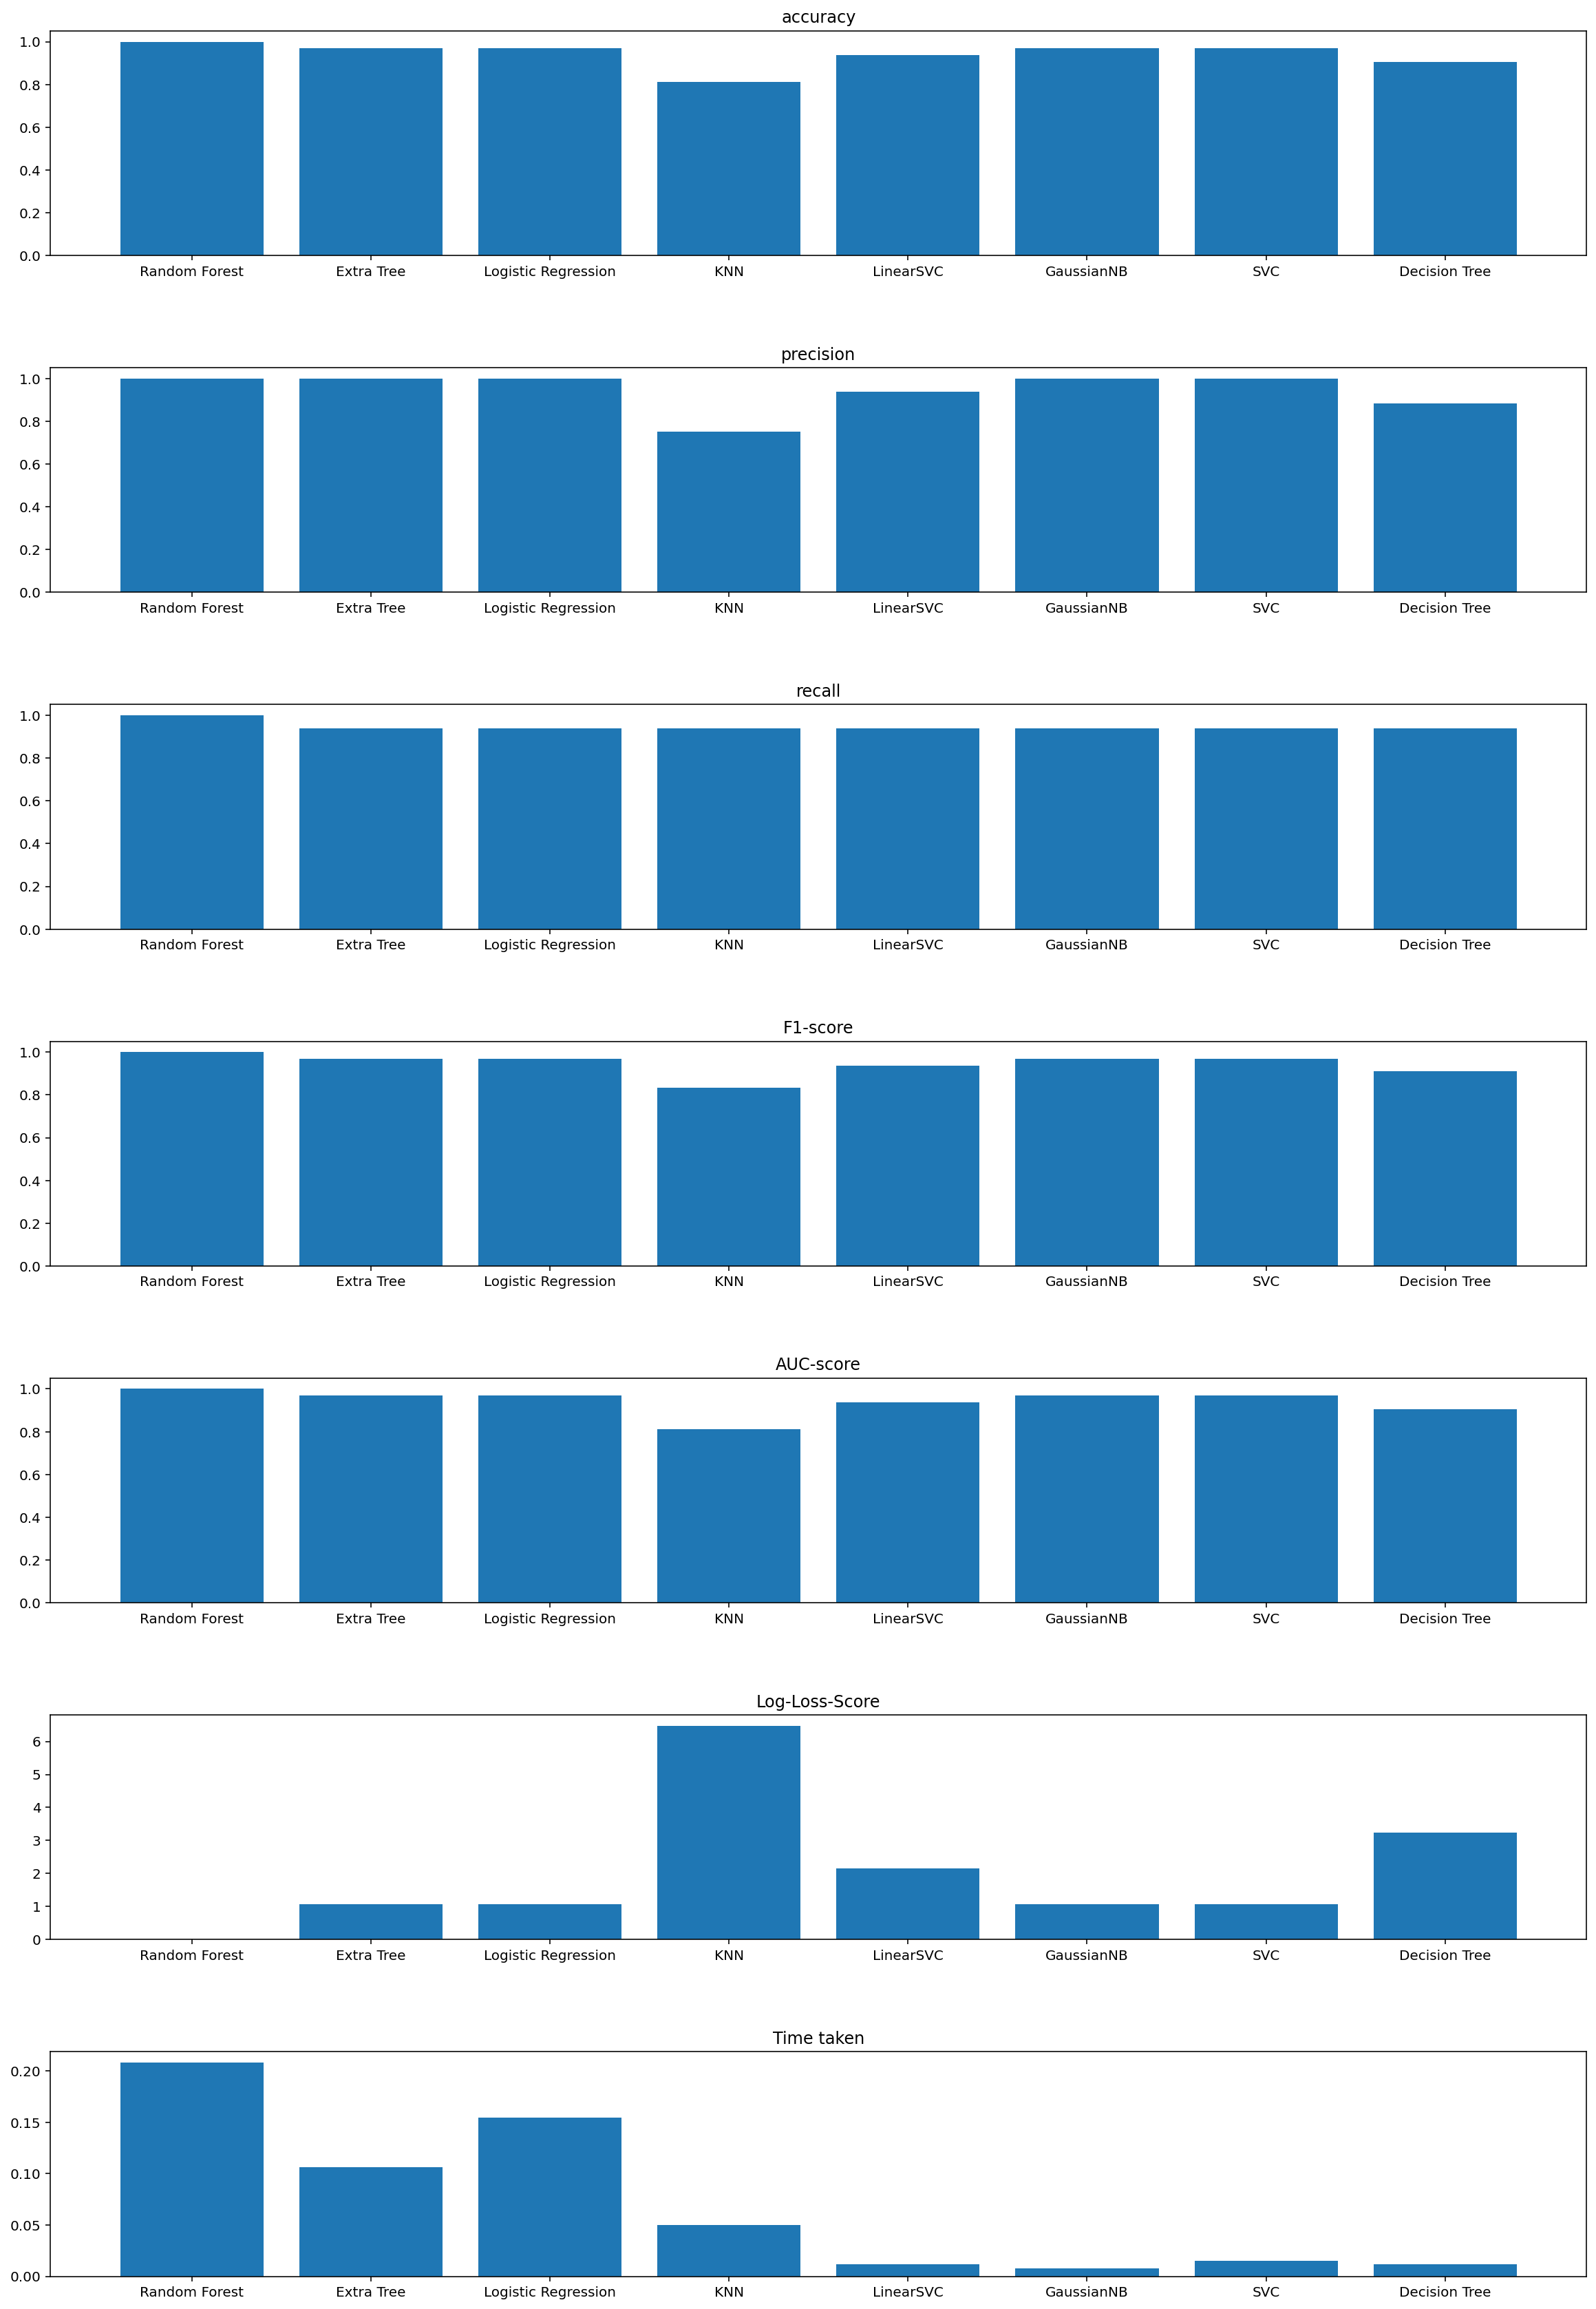

In [66]:
print("Base Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(20, 30))
ax[0].bar(df_base.model, df_base.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_base.model, df_base.precision)
ax[1].set_title('precision')

ax[2].bar(df_base.model, df_base.recall)
ax[2].set_title('recall')

ax[3].bar(df_base.model, df_base.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_base.model, df_base.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_base.model, df_base.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_base.model, df_base.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### RANDOMIZED MODEL

Randomized Model




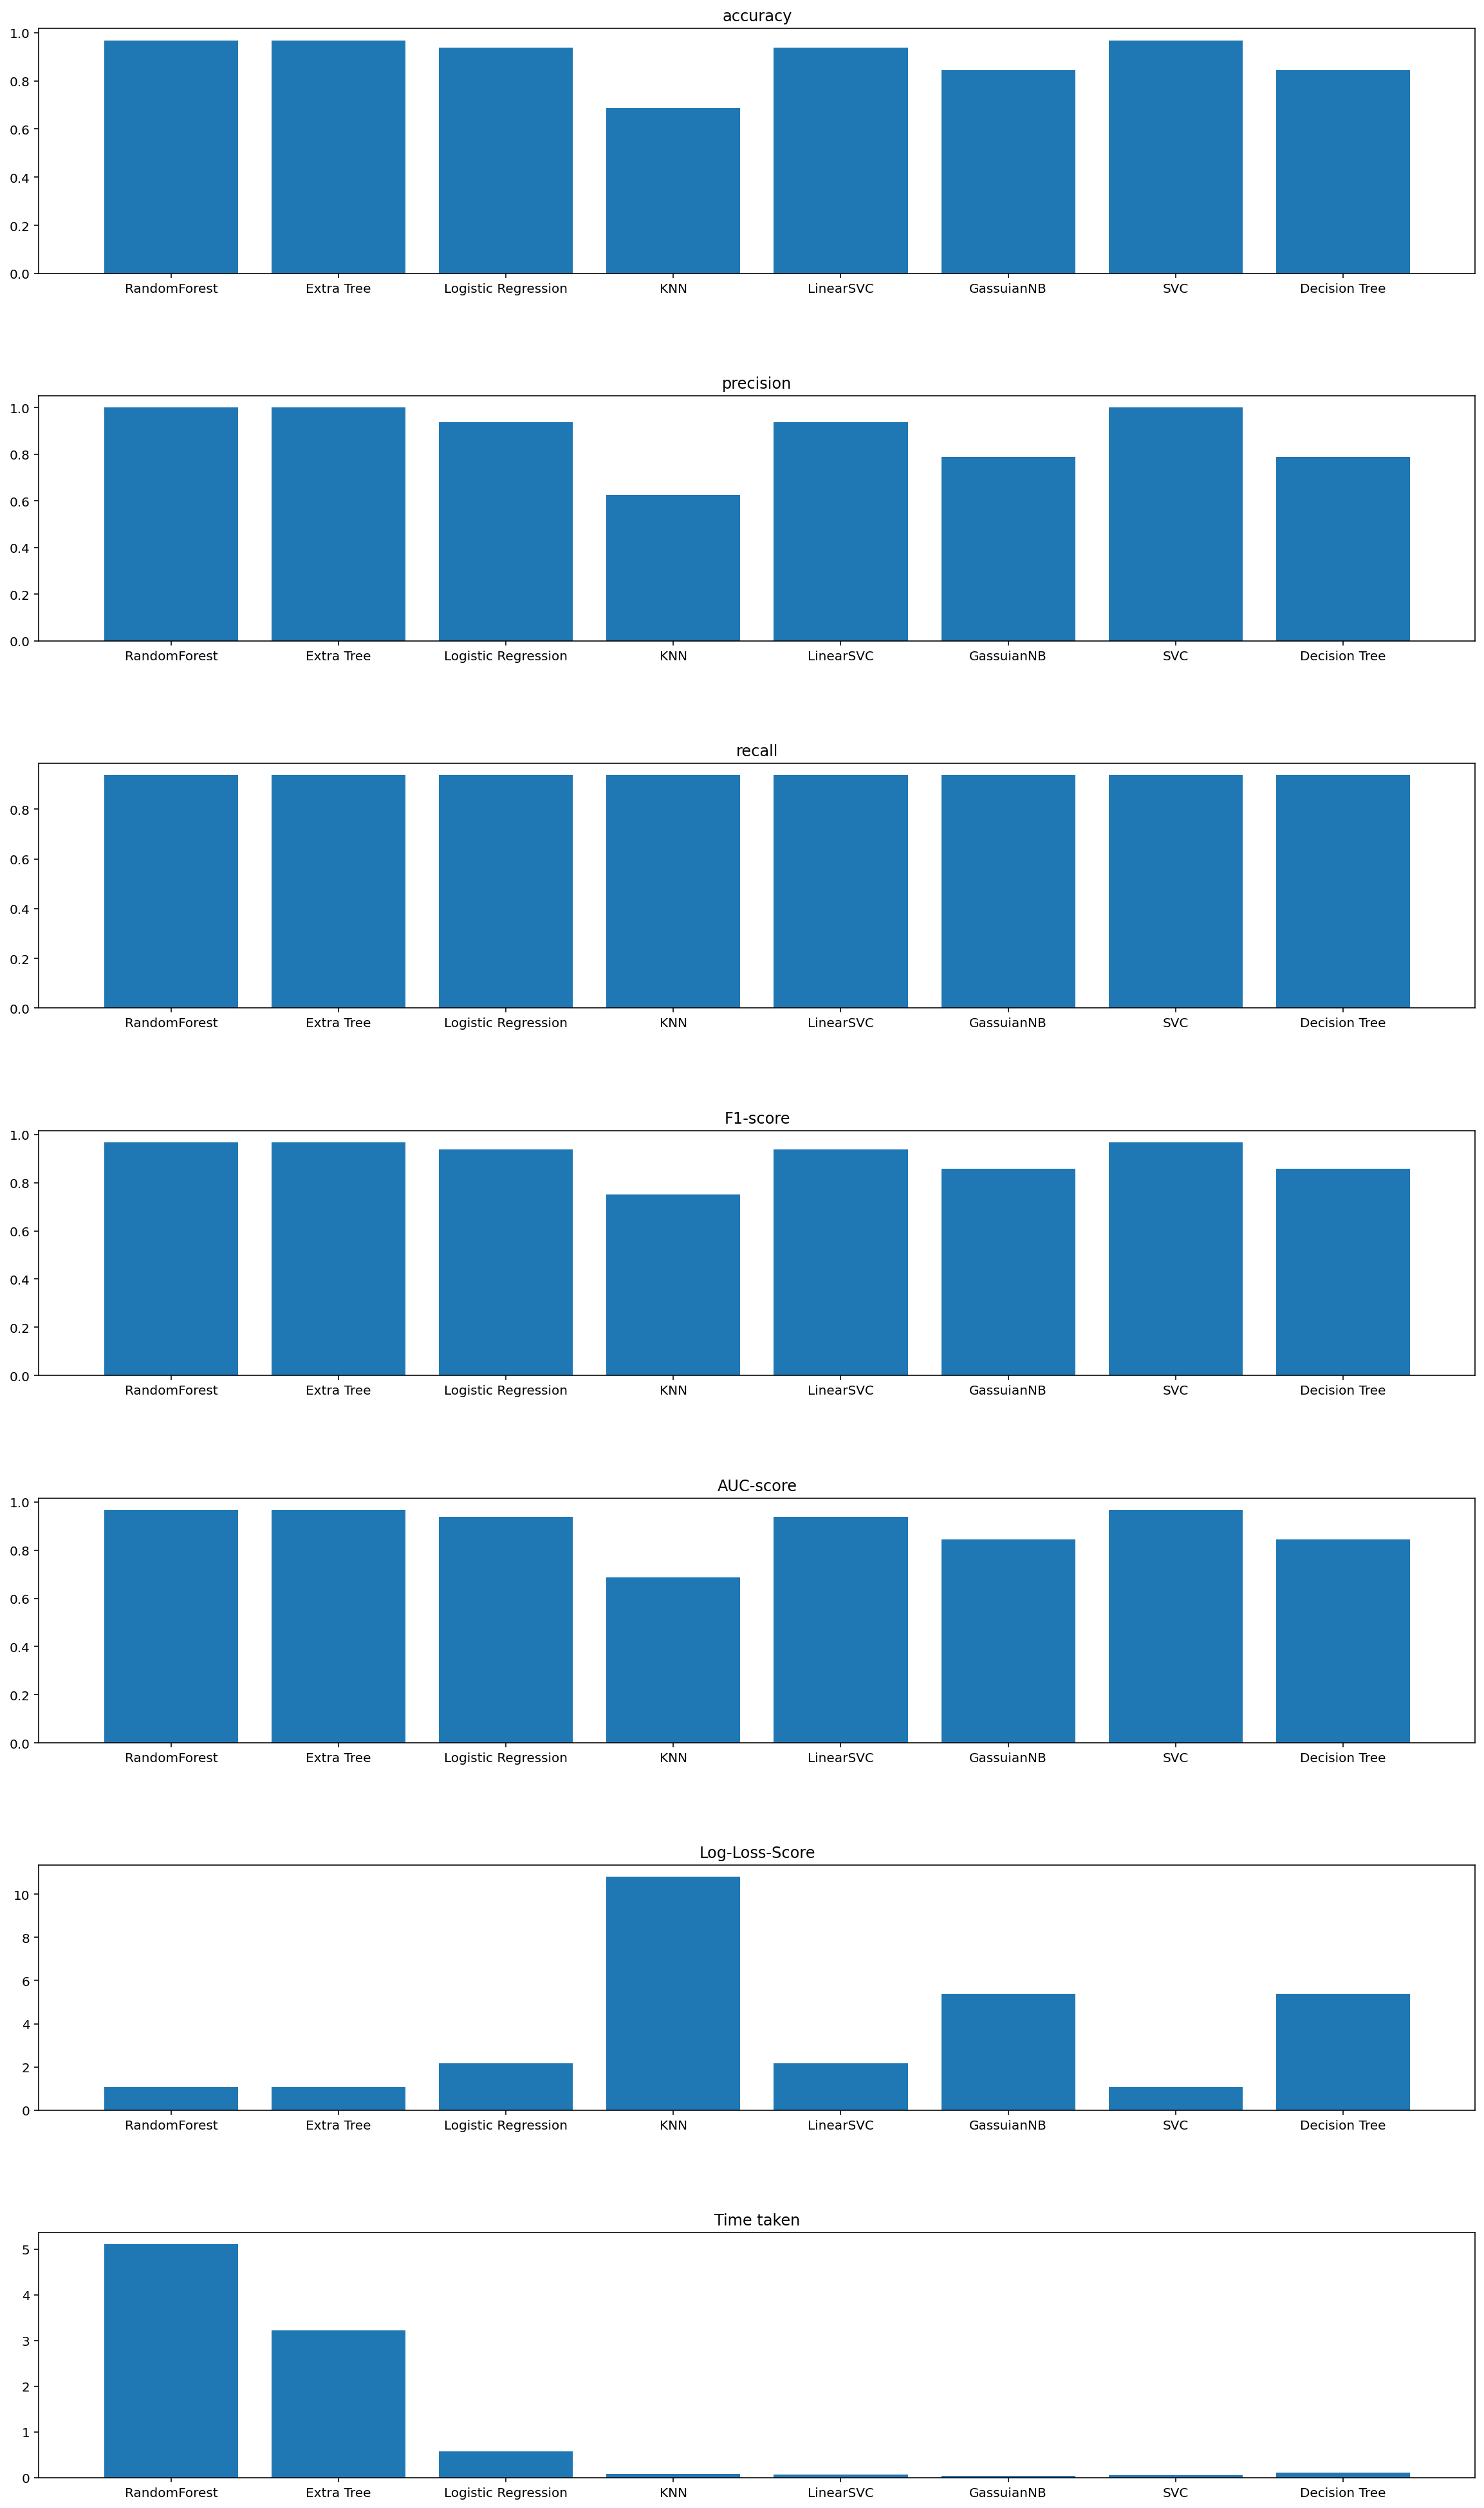

In [67]:
print("Randomized Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(20, 35))

ax[0].bar(df_randomized.model, df_randomized.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_randomized.model, df_randomized.precision)
ax[1].set_title('precision')

ax[2].bar(df_randomized.model, df_randomized.recall)
ax[2].set_title('recall')


ax[3].bar(df_randomized.model, df_randomized.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_randomized.model,df_randomized.rocauc)
ax[4].set_title('AUC-score')

ax[5].bar(df_randomized.model, df_randomized.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_randomized.model, df_randomized.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### BAT MODEL

Bat Model




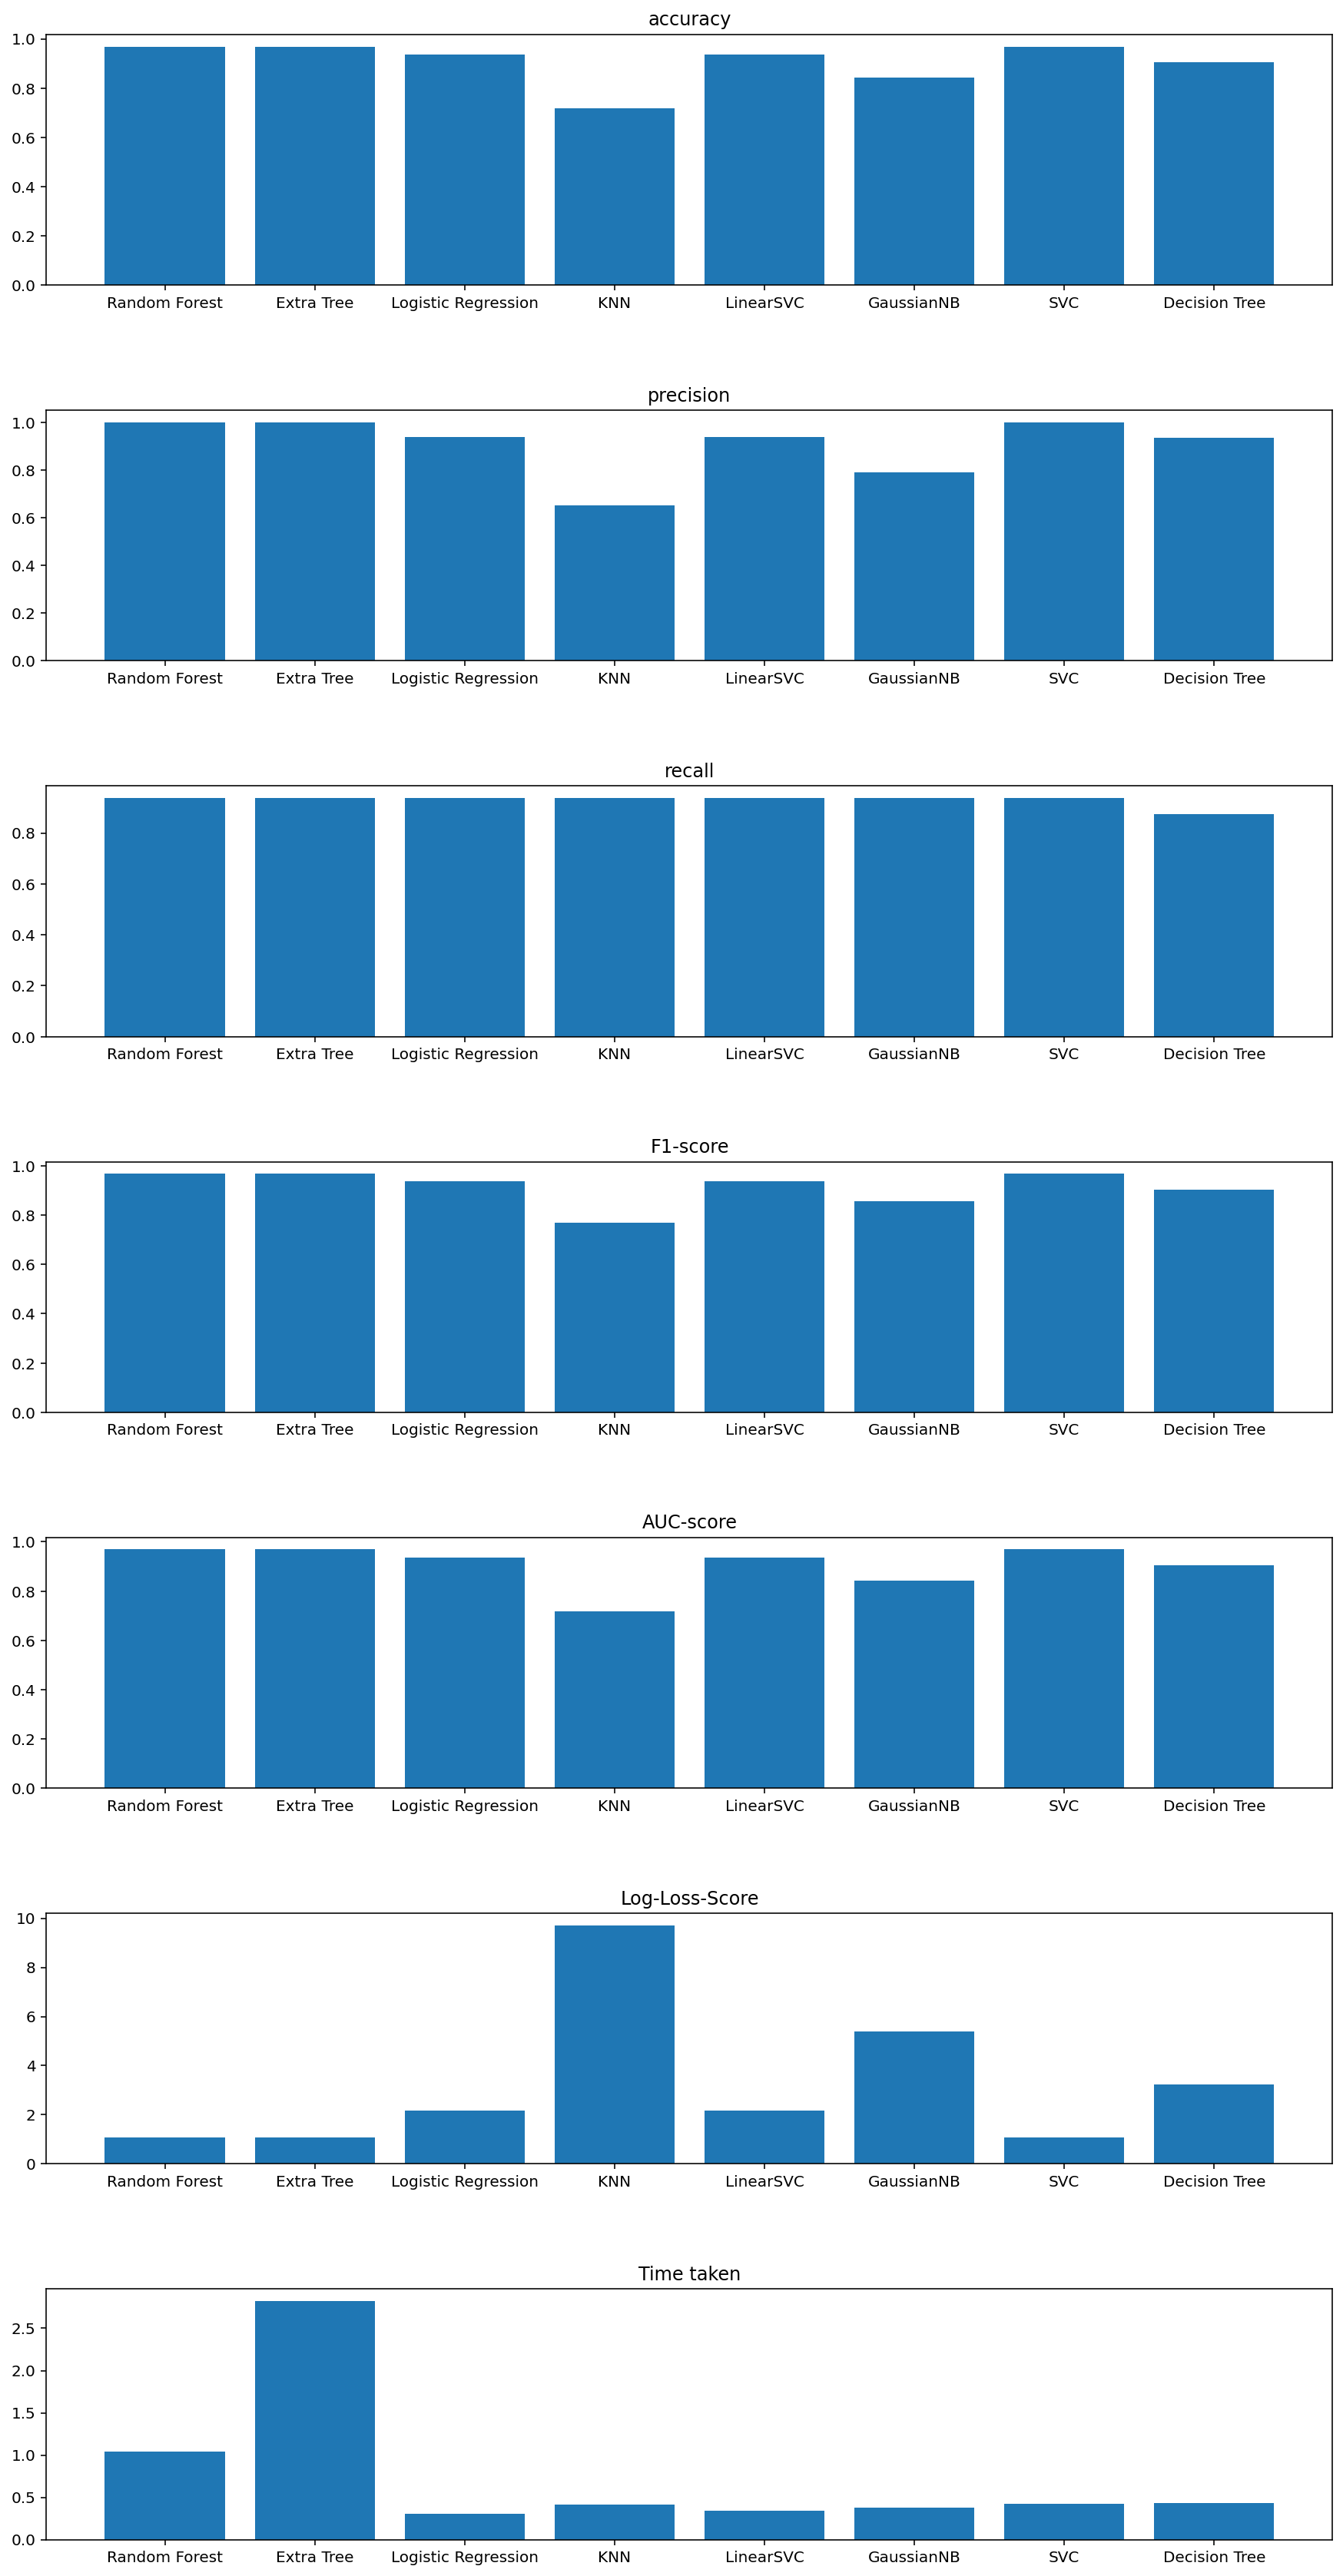

In [68]:
print("Bat Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))
ax[0].bar(df_bat.model, df_bat.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_bat.model, df_bat.precision)
ax[1].set_title('precision')

ax[2].bar(df_bat.model, df_bat.recall)
ax[2].set_title('recall')

ax[3].bar(df_bat.model, df_bat.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_bat.model, df_bat.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_bat.model, df_bat.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_bat.model, df_bat.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### HYBRID BAT MODEL

Hybrid Bat Model




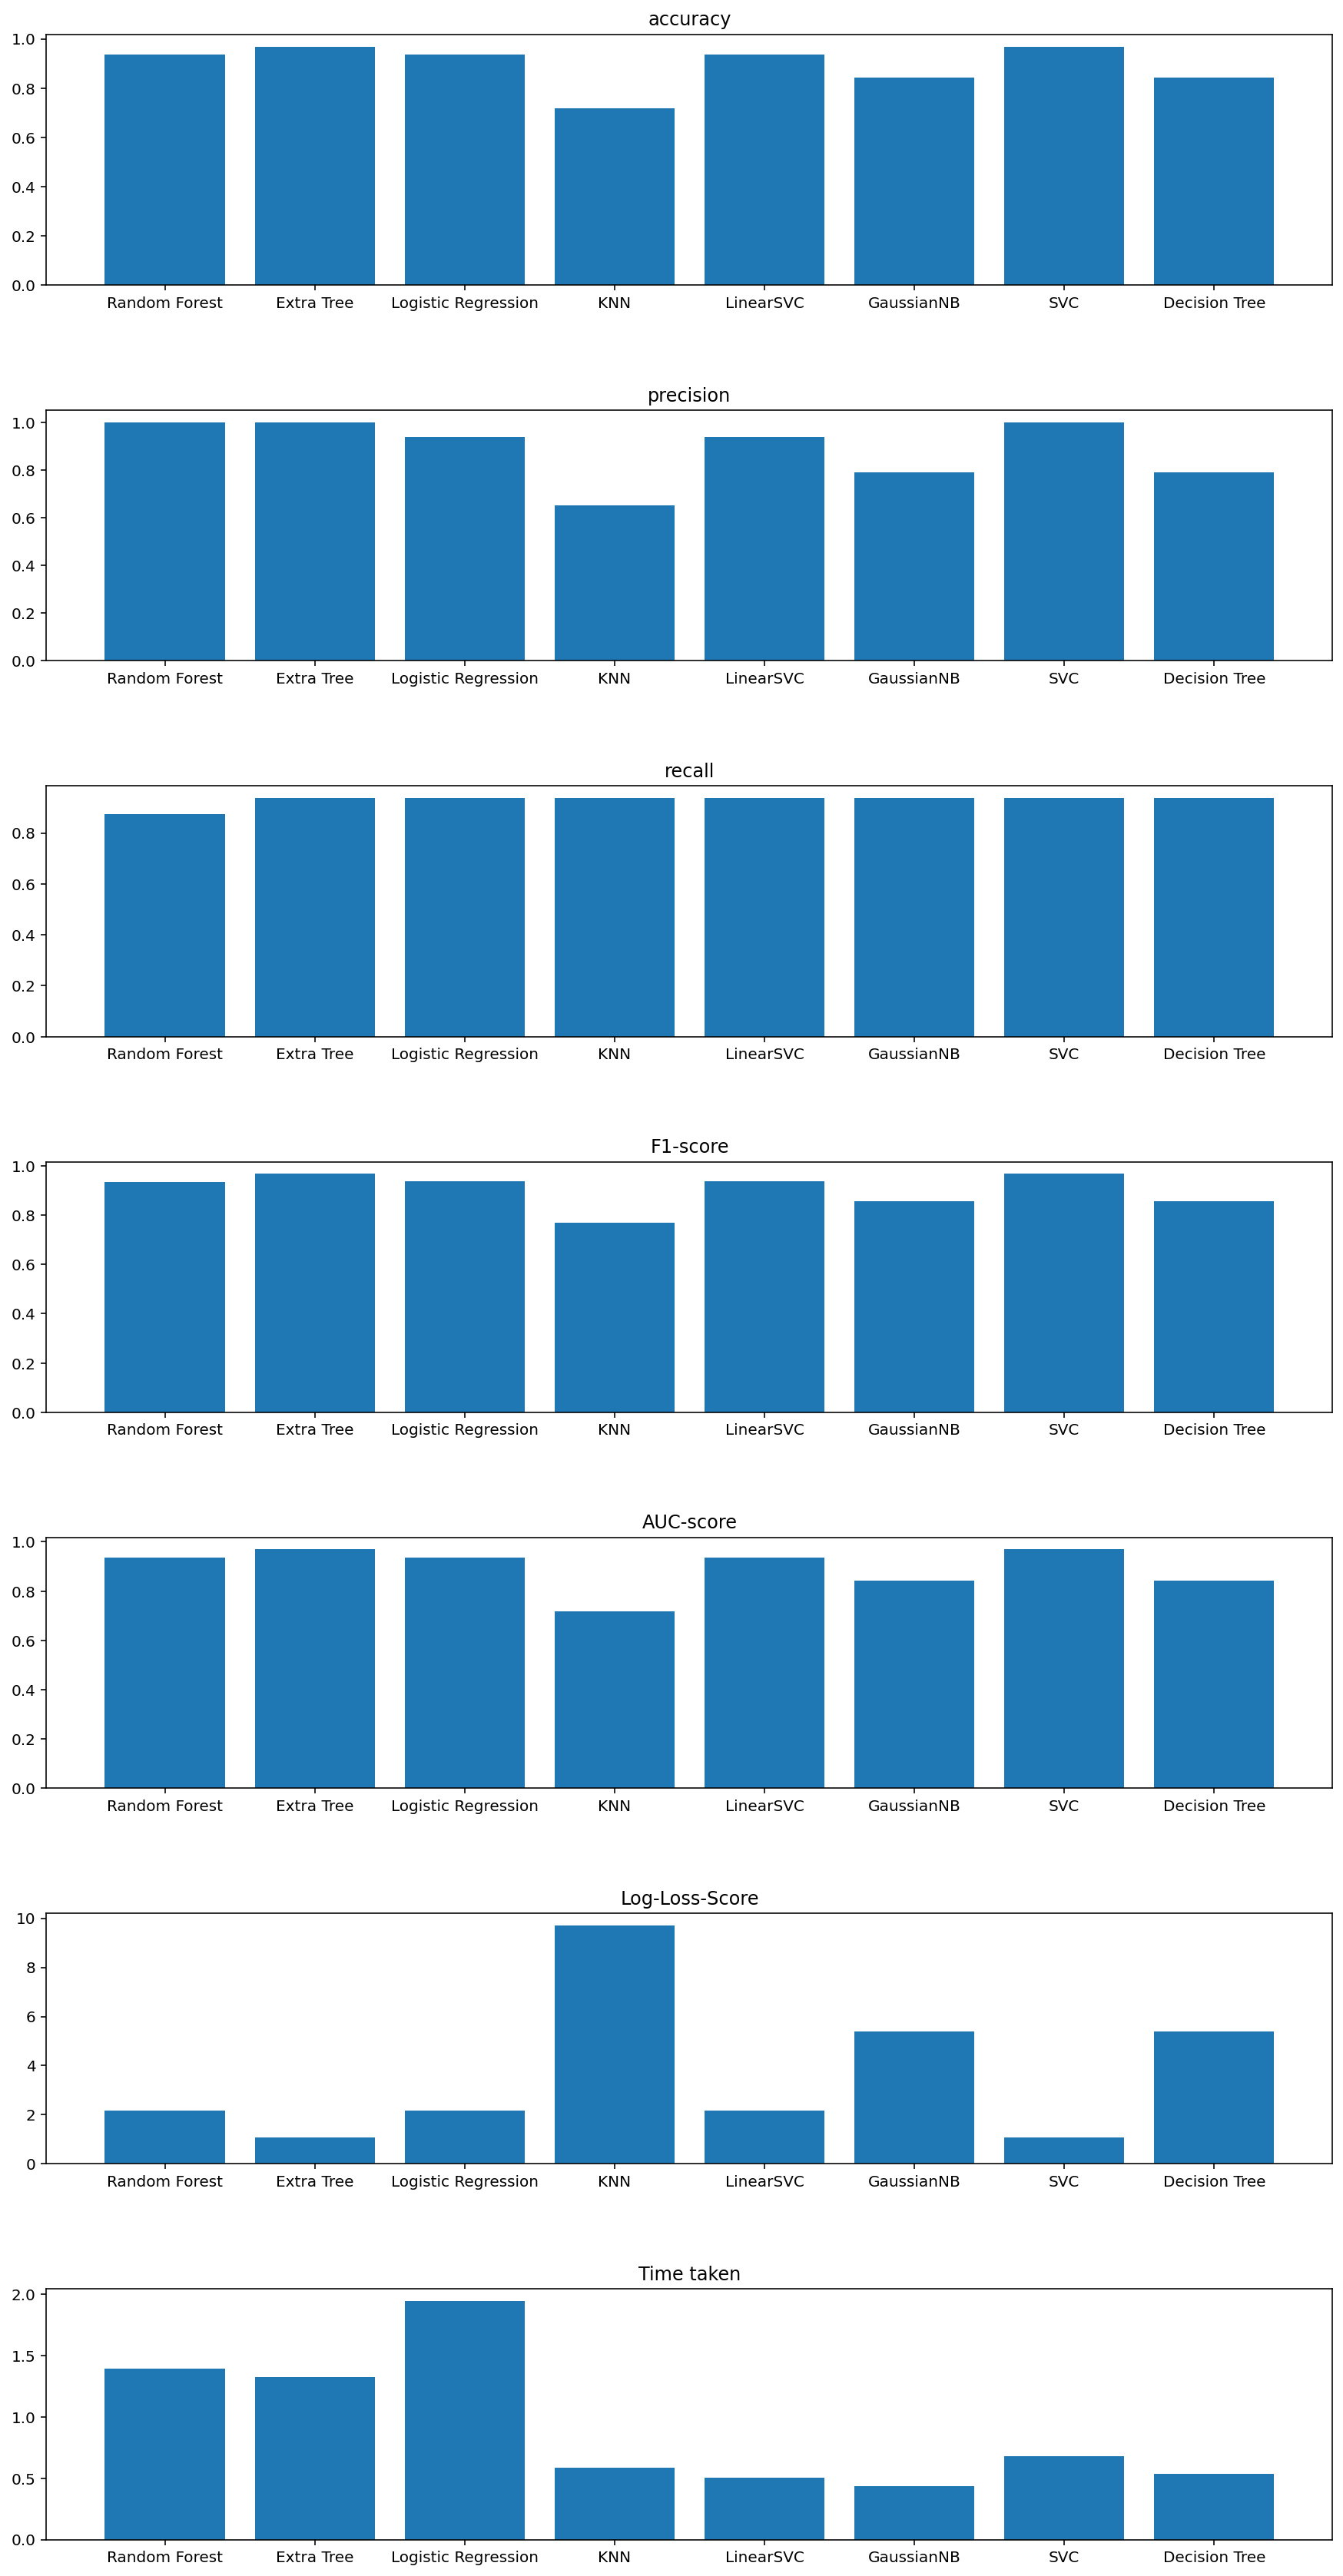

In [69]:
print("Hybrid Bat Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_hba.model, df_hba.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_hba.model, df_hba.precision)
ax[1].set_title('precision')

ax[2].bar(df_hba.model, df_hba.recall)
ax[2].set_title('recall')

ax[3].bar(df_hba.model, df_hba.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_hba.model, df_hba.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_hba.model, df_hba.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_hba.model, df_hba.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### GERY WOLF MODEL

Grey Wolf Model




NameError: name 'df_gwa' is not defined

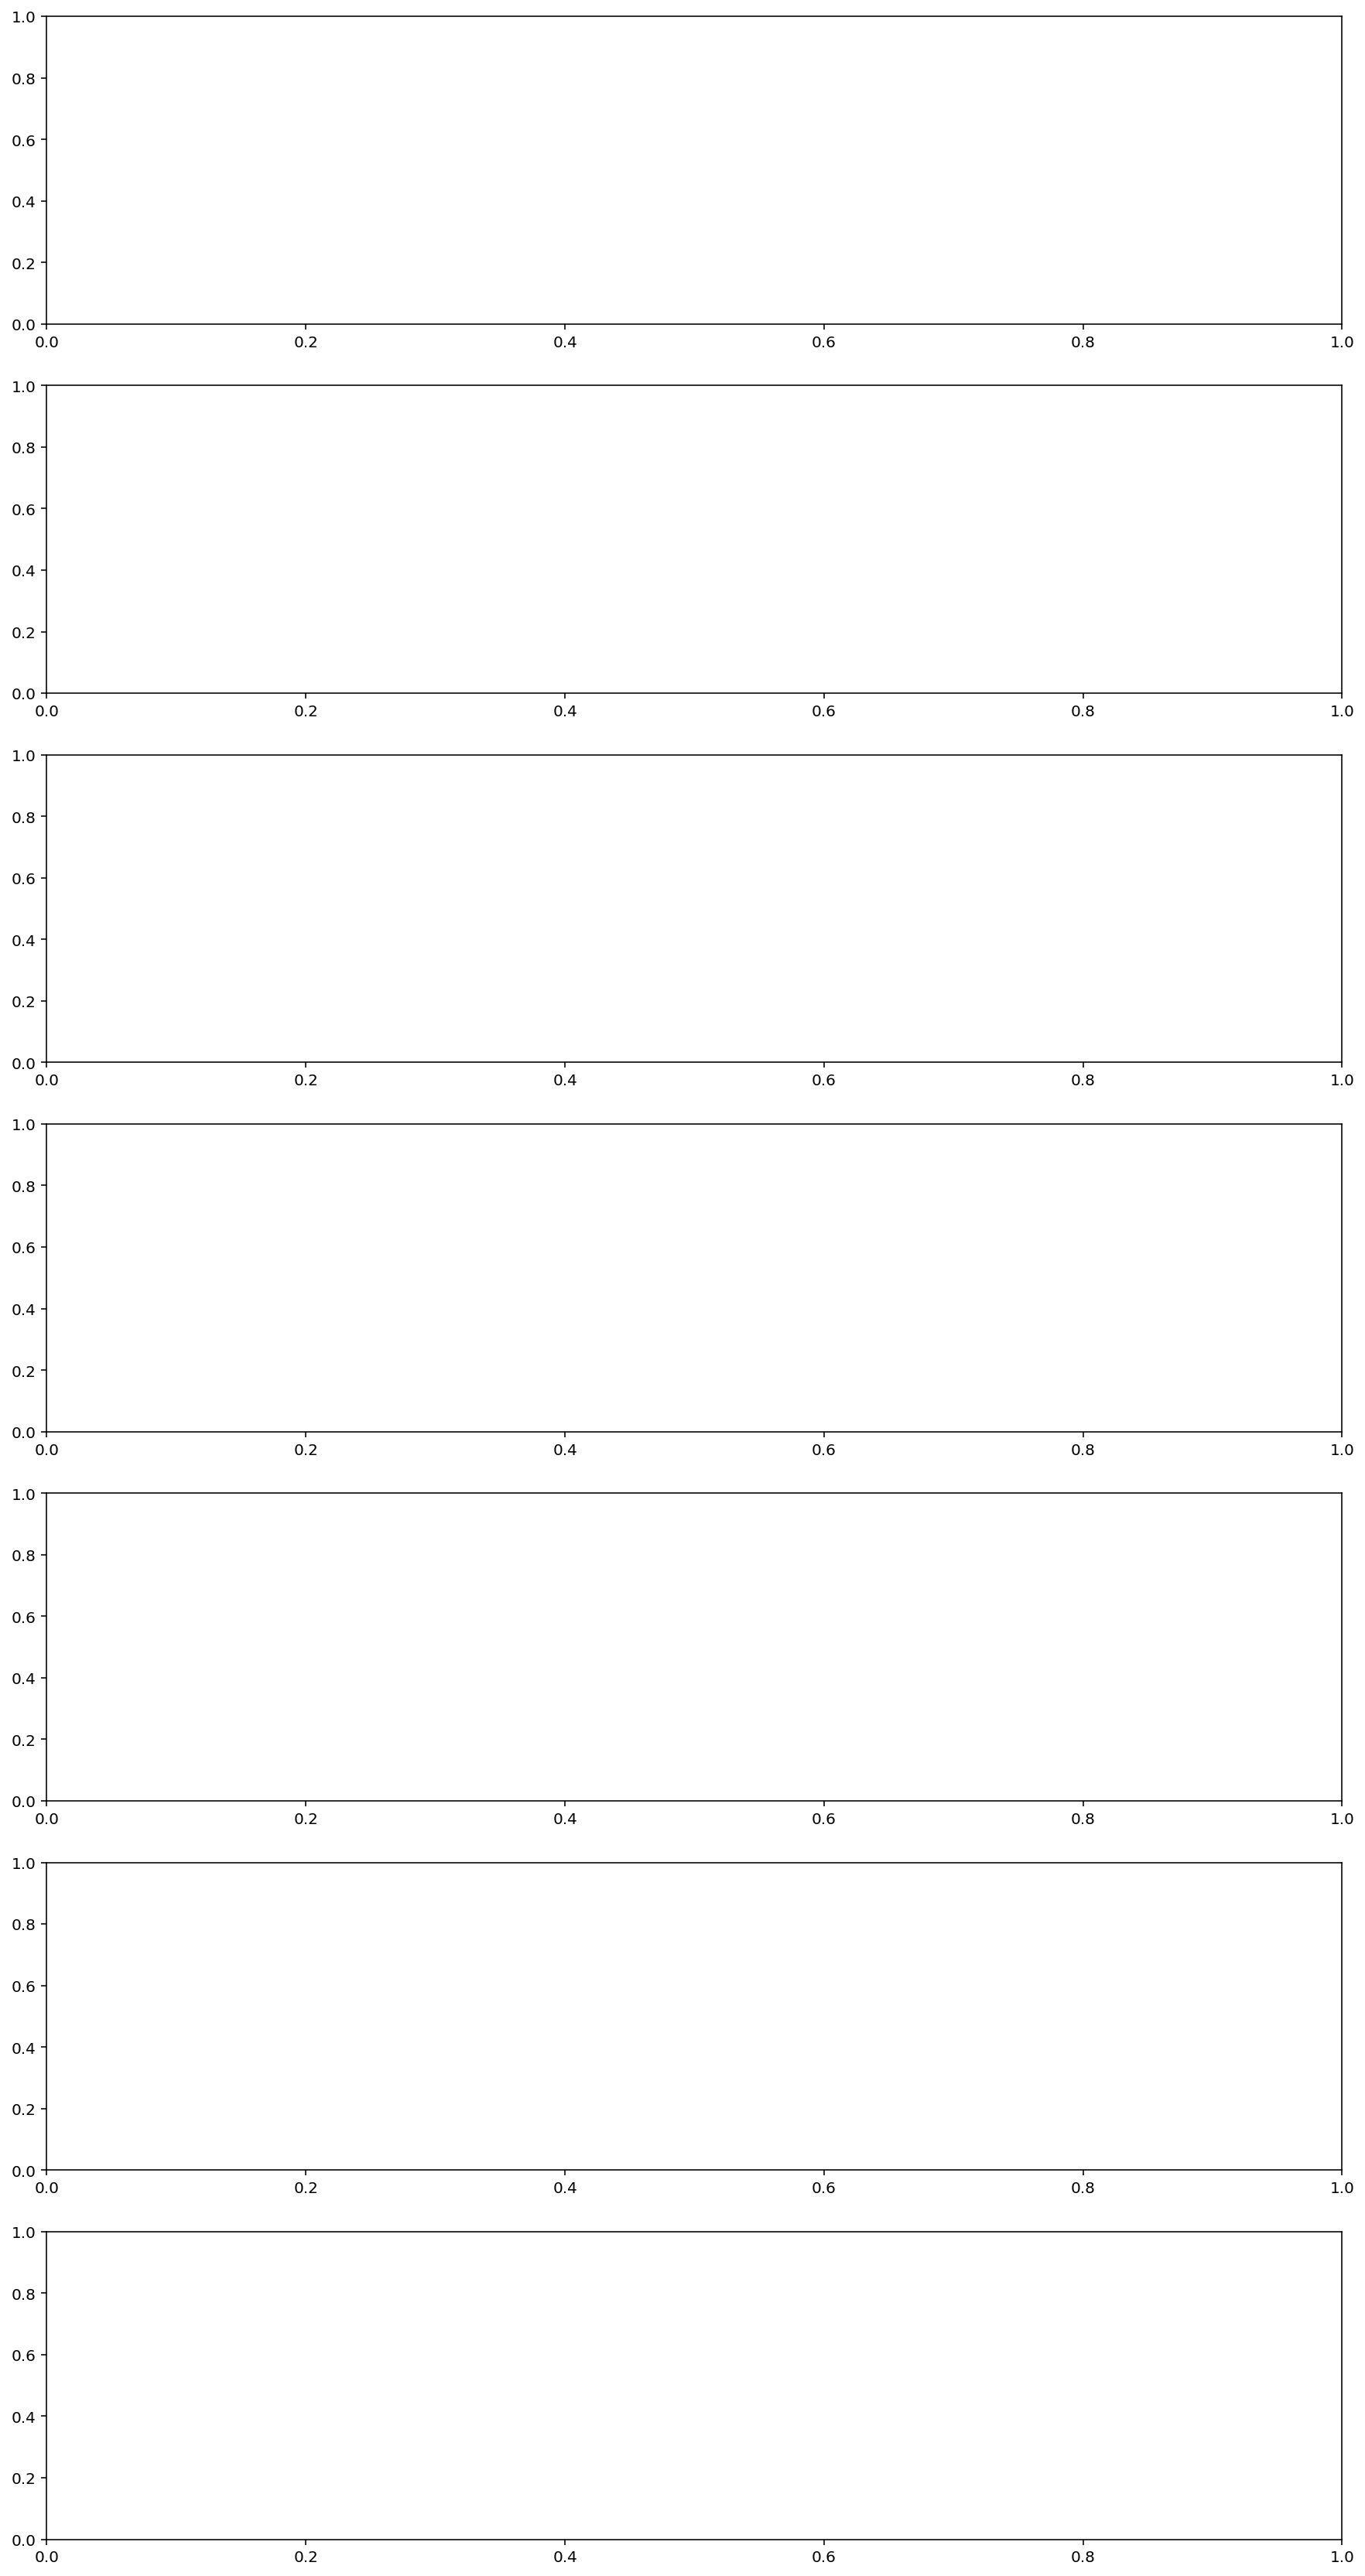

In [70]:
print("Grey Wolf Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_gwa.model, df_gwa.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_gwa.model, df_gwa.precision)
ax[1].set_title('precision')

ax[2].bar(df_gwa.model, df_gwa.recall)
ax[2].set_title('recall')

ax[3].bar(df_gwa.model, df_gwa.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_gwa.model, df_gwa.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_gwa.model, df_gwa.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_gwa.model, df_gwa.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

#### FIREFLY MODEL

In [ ]:
print("Firefly Model")
print('\n')
fig, ax = plt.subplots(7, 1, figsize=(15, 30))

ax[0].bar(df_fa.model, df_fa.accuracy)
ax[0].set_title('accuracy')

ax[1].bar(df_fa.model, df_fa.precision)
ax[1].set_title('precision')

ax[2].bar(df_fa.model, df_fa.recall)
ax[2].set_title('recall')

ax[3].bar(df_fa.model, df_fa.f1score)
ax[3].set_title('F1-score')

ax[4].bar(df_fa.model, df_fa.rocauc)
ax[4].set_title('AUC-score')                                                                                          
                                                                                                                   
ax[5].bar(df_fa.model, df_fa.logloss)
ax[5].set_title('Log-Loss-Score')

ax[6].bar(df_fa.model, df_fa.timetaken)
ax[6].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.5, wspace=0.5)

In [74]:
%%time
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV
time1 = time.time()
from sklearn.svm import LinearSVC
param_grid_lsvc={'tol': [1e-05,0.0001], 'intercept_scaling': [50,1], 'dual': [False], 'max_iter': [1700,100]}

clf_25 = LinearSVC(random_state=42)

nia_search25 = NatureInspiredSearchCV(
    clf_25,
    param_grid_lsvc,
    cv=3,
    verbose=2,
    algorithm='gwo', #  Greywolf  algorithm
    population_size=50,
    max_n_gen=100,
    max_stagnating_gen=20,
    runs=5,
    n_jobs=-1,
    random_state=42,
    
    # or any number if you want same results on each run
)


nia_search25.fit(X_train, y_train)
print("Greywolf  model")

print("LinearSVC")

gwa_lsvc= nia_search25.best_estimator_
model45=evaluate(gwa_lsvc , X_test,  y_test, 'LinearSVC')
model45.timetaken[0] = time.time() - time1
print(model45)
print("confusion matrix")
y_pred5=gwa_lsvc.predict(X_test)
print(confusion_matrix(y_test, y_pred5))

Fitting 3 folds for some of the 8 candidates, which might total in 24 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'